Ưu điểm:
- Giảm số lượng đầu vào cho các nn
- Thay đổi để đáp ứng các nhu cầu về kích thước

Nhược điểm:
- Mất chi tiết: khi giảm kích thước có thể gây mất chi tiết, khiến hình ảnh  bị mờ
- Nhiếu: phóng to hình ảnh có thể gây hiện tượng nhiễu hoặc làm cho hình ảnh trông như bị vỡ điểm ảnh
- Hiện tượng nội suy: Việc lựa chọn phương pháp nội suy có thể ảnh hưởng đến độ mụn và độ sắc nét của hình ảnh được thay đổi kích thước

The cv2.resize() function has several parameters:


- src: The source image to resize.
- dsize: The desired size of the output image as a tuple (width, height).
- fx and fy: Scale factors along the x and y axis (optional, used instead of dsize).
- interpolation: The interpolation method to use (optional). Common options include:
    + cv2.INTER_NEAREST
    + cv2.INTER_LINEAR (default)
    + cv2.INTER_CUBIC
    + cv2.INTER_LANCZOS4

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

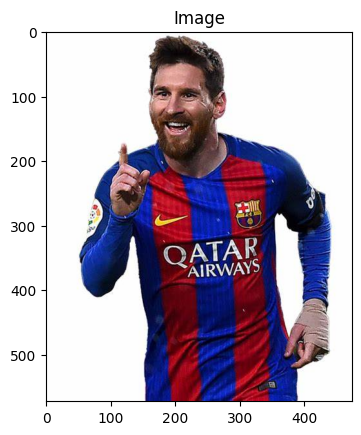

In [4]:
img = cv.imread('../image/OIP.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img), plt.title('Image')
plt.show()

In [6]:
img.shape

(573, 474, 3)

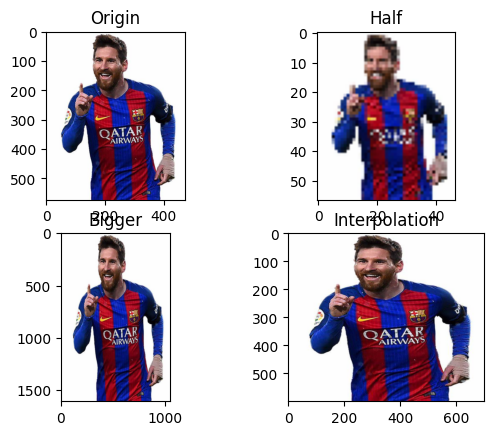

In [13]:
half = cv.resize(img, (0,0), fx=0.1, fy=0.1) #khi đặt (0,0)  cho tham số kích thước, OpenCV sẽ tự động tính toán kích thước đầu ra dựa trên các hệ số tỷ lệ fx và fy.
bigger = cv.resize(img, (1050, 1610))
stretch_near = cv.resize(img, (700, 600), interpolation=cv.INTER_LINEAR)
Titles = ["Origin", "Half", "Bigger", "Interpolation"]
imgs = [img, half, bigger, stretch_near]
conut = 4
for i in range(conut):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[i])
    plt.title(Titles[i])
plt.show()

**Nhận xét**

Half: Ảnh này đã được giảm kích thước xuống còn 10% so với kích thước ban đầu (cả chiều rộng và chiều cao). Kết quả là ảnh nhỏ hơn nhiều so với ảnh gốc, ảnh bị vỡ.

Bigger: Ảnh này đã được phóng to lên kích thước 1050x1610. Kích thước lớn hơn có thể làm giảm chất lượng ảnh, gây ra hiện tượng mờ , không rõ nét.

Interpolation: Ảnh này đã được thay đổi kích thước thành 700x600 với phương pháp nội suy tuyến tính (INTER_LINEAR). Phương pháp này giúp duy trì chất lượng ảnh tốt hơn khi thay đổi kích thước.

In [ ]:
resized_img = cv.resize(img, (width, height))

### Làm cách nào để duy trì tỷ lệ khung hình khi thay đổi kích thước hình ảnh trong Python?

In [19]:
# Để duy trì kích thước ban đầu, ta cần tính toán cách chiều mới dựa trên kích thược mong muốn
img = cv.imread('../image/OIP.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

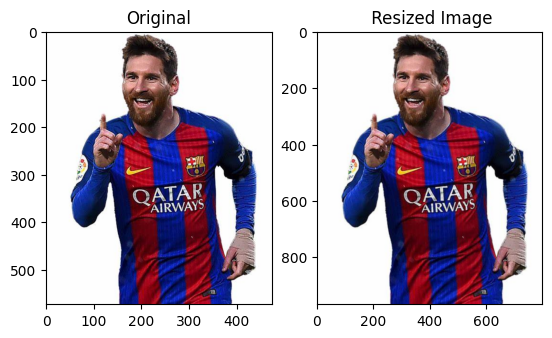

In [20]:
(h, w) = img.shape[:2]
new_width = 800
#Tinh toan ty le khung
ratio = float(new_width)/w
new_height = int(h * ratio)
#resize
resized_img = cv.resize(img, (new_width, new_height))
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.subplot(122), plt.imshow(resized_img), plt.title(" Resized Image")
plt.show()